In [138]:
import torch
import torchvision
import torch.nn.functional as F

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# 有 GPU 就用 GPU，没有就用 CPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')


In [139]:
device


device(type='cuda', index=0)

In [140]:
plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号


导入pillow中文字体


In [141]:
from PIL import Image, ImageFont, ImageDraw
# 导入中文字体，指定字号
font = ImageFont.truetype('simkai.ttf', 32)


载入类别


In [142]:
idx_to_labels = np.load('idx_to_labels.npy', allow_pickle=True).item()


In [143]:
idx_to_labels


{0: '乌鸦',
 1: '乌龟',
 2: '仓鼠',
 3: '企鹅',
 4: '兔子',
 5: '刺猬',
 6: '啄木鸟',
 7: '土狼',
 8: '大猩猩',
 9: '大象',
 10: '奶牛',
 11: '山羊',
 12: '斑马',
 13: '松鼠',
 14: '毛毛虫',
 15: '水母',
 16: '水獭',
 17: '河马',
 18: '浣熊',
 19: '海星',
 20: '海豚',
 21: '海豹',
 22: '海马',
 23: '火烈鸟',
 24: '火鸡',
 25: '熊',
 26: '熊猫',
 27: '牛',
 28: '牡蛎',
 29: '犀牛',
 30: '犀鸟',
 31: '狐狸',
 32: '狗',
 33: '狮子',
 34: '狼',
 35: '猩猩',
 36: '猪',
 37: '猫',
 38: '猫头鹰',
 39: '獾',
 40: '瓢虫',
 41: '甲虫',
 42: '章鱼',
 43: '羊',
 44: '羚羊',
 45: '老虎',
 46: '老鼠',
 47: '考拉',
 48: '苍蝇',
 49: '蚊子',
 50: '蚱蜢',
 51: '蛇',
 52: '蛾',
 53: '蜂鸟',
 54: '蜜蜂',
 55: '蜥蜴',
 56: '蜻蜓',
 57: '蝙蝠',
 58: '蝴蝶',
 59: '蟑螂',
 60: '蟹',
 61: '袋熊',
 62: '袋鼠',
 63: '豪猪',
 64: '豹',
 65: '负鼠',
 66: '野牛',
 67: '野猪',
 68: '金鱼',
 69: '霍加皮',
 70: '马',
 71: '驯鹿',
 72: '驴',
 73: '鬣狗',
 74: '鱿鱼',
 75: '鲨鱼',
 76: '鲸鱼',
 77: '鸭',
 78: '鸽子',
 79: '鹅',
 80: '鹈鹕',
 81: '鹦鹉',
 82: '鹬',
 83: '鹰',
 84: '鹿',
 85: '麻雀',
 86: '黑猩猩',
 87: '鼠',
 88: '龙虾'}

导入训练好的模型


In [144]:
model = torch.load('checkpoints/best-0.895.pth')
model = model.eval().to(device)


预处理


In [145]:
from torchvision import transforms
# 测试集图像预处理-RCTN：缩放、裁剪、转 Tensor、归一化
test_transform = transforms.Compose([transforms.Resize(256),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize(
                                         mean=[0.485, 0.456, 0.406],
                                         std=[0.229, 0.224, 0.225])
                                    ])


载入一张测试图像


In [146]:
from PIL import Image


In [147]:
img_path = 'animals_split/train/老鼠/1b252b4e31.jpg'

In [148]:
img_pil = Image.open(img_path)


In [149]:
np.array(img_pil).shape


(840, 1200, 3)

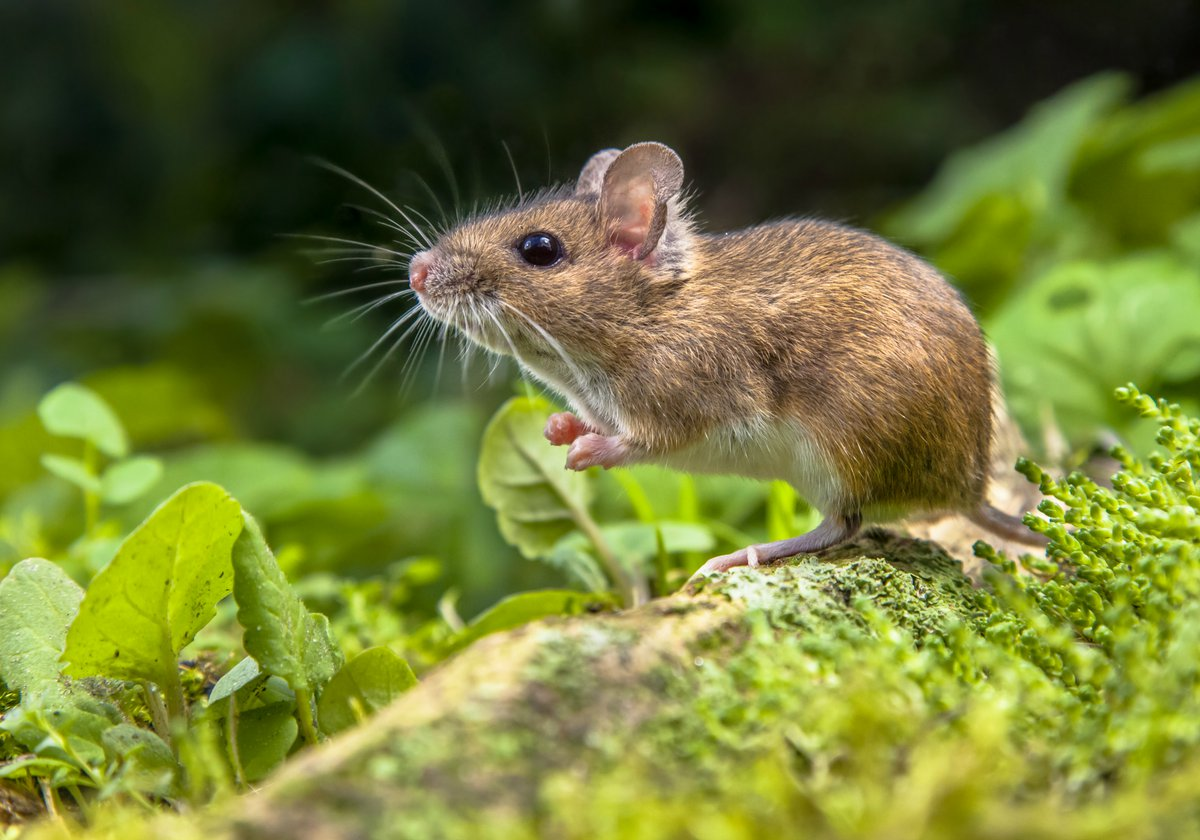

In [150]:
img_pil


预处理、前向预测


In [151]:
input_img = test_transform(img_pil) # 预处理


In [152]:
input_img.shape


torch.Size([3, 224, 224])

In [153]:
input_img = input_img.unsqueeze(0).to(device)


In [154]:
input_img.shape


torch.Size([1, 3, 224, 224])

In [155]:
# 执行前向预测，得到所有类别的 logit 预测分数
pred_logits = model(input_img)

In [156]:
pred_logits


tensor([[-12.3854,  -8.7518,  -1.6284, -11.0937,  -2.5965,  -2.9387,  -8.9038,
          -7.0195, -11.2840, -12.5978, -11.4672,  -8.3194, -12.7968,  -2.8365,
          -5.6744, -11.7099,  -4.0405, -10.9355,  -5.2802, -10.5917, -10.1282,
          -7.2177,  -8.8365, -11.1690,  -9.5505,  -7.2880, -13.0902, -13.5628,
         -10.9597, -14.1700, -10.0049,  -6.9070,  -9.8593, -11.7360,  -9.0588,
         -12.1410,  -8.2180,  -8.8267,  -8.3569,  -6.9291,  -8.0773,  -9.9478,
          -9.2293,  -9.0129,  -8.3314, -10.6291,   1.5860, -10.2867,  -8.8100,
          -9.3132,  -7.7517,  -9.4717,  -6.8446,  -7.8372,  -7.9141,  -7.2391,
          -8.8631,  -7.8916,  -9.4697, -11.6819, -10.7383,  -6.6976,  -8.2337,
          -4.7896, -10.7677,  -2.4221, -13.3019,  -7.2483,  -9.9819, -11.6915,
         -12.3083,  -7.4507,  -9.2500, -10.4899, -11.5400, -11.1390, -12.9919,
          -7.6213, -10.7805, -10.2708,  -8.5604,  -9.3859,  -7.4317, -10.5172,
          -6.7492,  -8.7030, -10.6435,   0.5043, -10

In [157]:
pred_softmax = F.softmax(pred_logits, dim=1) # 对 logit 分数做 softmax 运算


In [158]:
pred_softmax


tensor([[5.9178e-07, 2.2397e-05, 2.7789e-02, 2.1533e-06, 1.0554e-02, 7.4958e-03,
         1.9240e-05, 1.2663e-04, 1.7802e-06, 4.7852e-07, 1.4822e-06, 3.4512e-05,
         3.9220e-07, 8.3020e-03, 4.8605e-04, 1.1629e-06, 2.4906e-03, 2.5226e-06,
         7.2093e-04, 3.5575e-06, 5.6548e-06, 1.0387e-04, 2.0578e-05, 1.9972e-06,
         1.0077e-05, 9.6806e-05, 2.9245e-07, 1.8231e-07, 2.4623e-06, 9.9334e-08,
         6.3973e-06, 1.4170e-04, 7.3997e-06, 1.1329e-06, 1.6477e-05, 7.5558e-07,
         3.8196e-05, 2.0781e-05, 3.3245e-05, 1.3860e-04, 4.3968e-05, 6.7730e-06,
         1.3895e-05, 1.7251e-05, 3.4101e-05, 3.4269e-06, 6.9158e-01, 4.8264e-06,
         2.1132e-05, 1.2776e-05, 6.0890e-05, 1.0903e-05, 1.5083e-04, 5.5897e-05,
         5.1761e-05, 1.0166e-04, 2.0039e-05, 5.2939e-05, 1.0925e-05, 1.1958e-06,
         3.0723e-06, 1.7471e-04, 3.7602e-05, 1.1775e-03, 2.9834e-06, 1.2565e-02,
         2.3666e-07, 1.0073e-04, 6.5458e-06, 1.1845e-06, 6.3917e-07, 8.2276e-05,
         1.3609e-05, 3.9387e

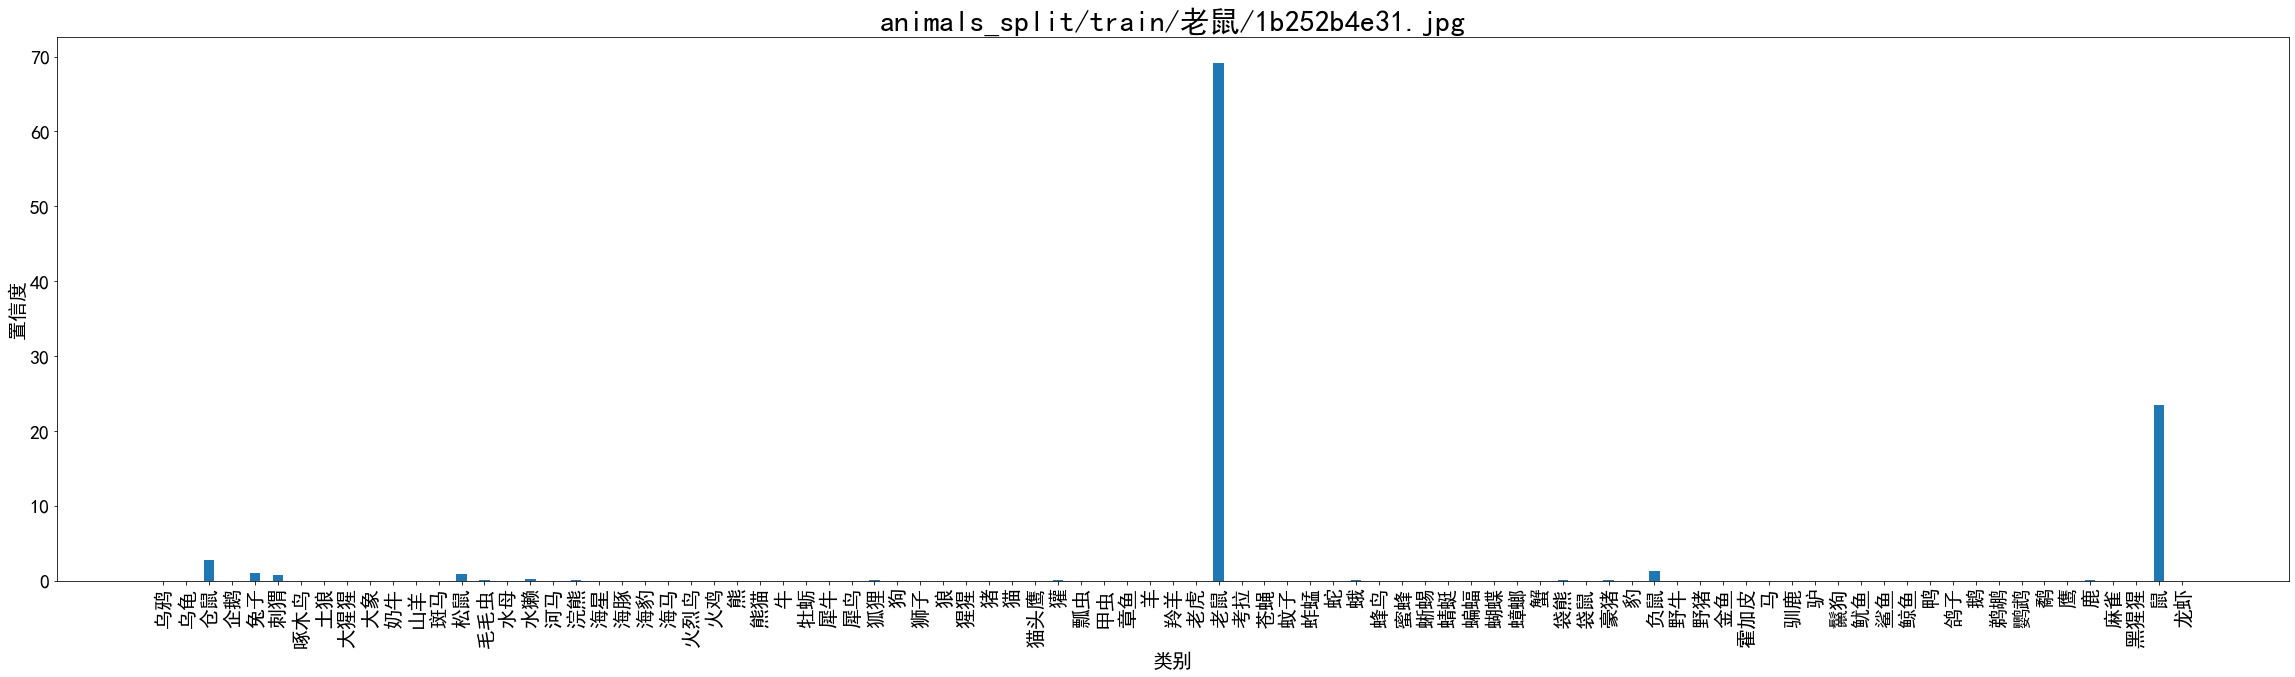

In [159]:
plt.figure(figsize=(40, 10))

x = idx_to_labels.values()
y = pred_softmax.cpu().detach().numpy()[0] * 100
width = 0.45 # 柱状图宽度

ax = plt.bar(x, y, width)

#plt.bar_label(ax, fmt='%.2f', fontsize=15) # 置信度数值
plt.tick_params(labelsize=20) # 设置坐标文字大小

plt.title(img_path, fontsize=30)
plt.xticks(rotation=90) # 横轴文字旋转
plt.xlabel('类别', fontsize=20)
plt.ylabel('置信度', fontsize=20)
plt.show()

置信度最大的前 n 个结果


In [160]:
n = 10
top_n = torch.topk(pred_softmax, n) # 取置信度最大的 n 个结果
pred_ids = top_n[1].cpu().detach().numpy().squeeze() # 解析出类别
confs = top_n[0].cpu().detach().numpy().squeeze() # 解析出置信度


In [161]:
pred_ids


array([46, 87,  2, 65,  4, 13,  5, 16, 63, 18], dtype=int64)

In [162]:
confs


array([0.6915831 , 0.23446536, 0.02778885, 0.01256541, 0.01055388,
       0.00830198, 0.00749584, 0.00249058, 0.00117749, 0.00072093],
      dtype=float32)

图像分类结果写在原图上


In [163]:
draw = ImageDraw.Draw(img_pil)


In [164]:
for i in range(n):
    class_name = idx_to_labels[pred_ids[i]] # 获取类别名称
    confidence = confs[i] * 100 # 获取置信度
    text = '{:<15} {:>.4f}'.format(class_name, confidence)
    print(text)

    # 文字坐标，中文字符串，字体，rgba颜色
    draw.text((50, 100 + 50 * i), text, font=font, fill=(255, 0, 0, 1))


老鼠              69.1583
鼠               23.4465
仓鼠              2.7789
负鼠              1.2565
兔子              1.0554
松鼠              0.8302
刺猬              0.7496
水獭              0.2491
豪猪              0.1177
浣熊              0.0721


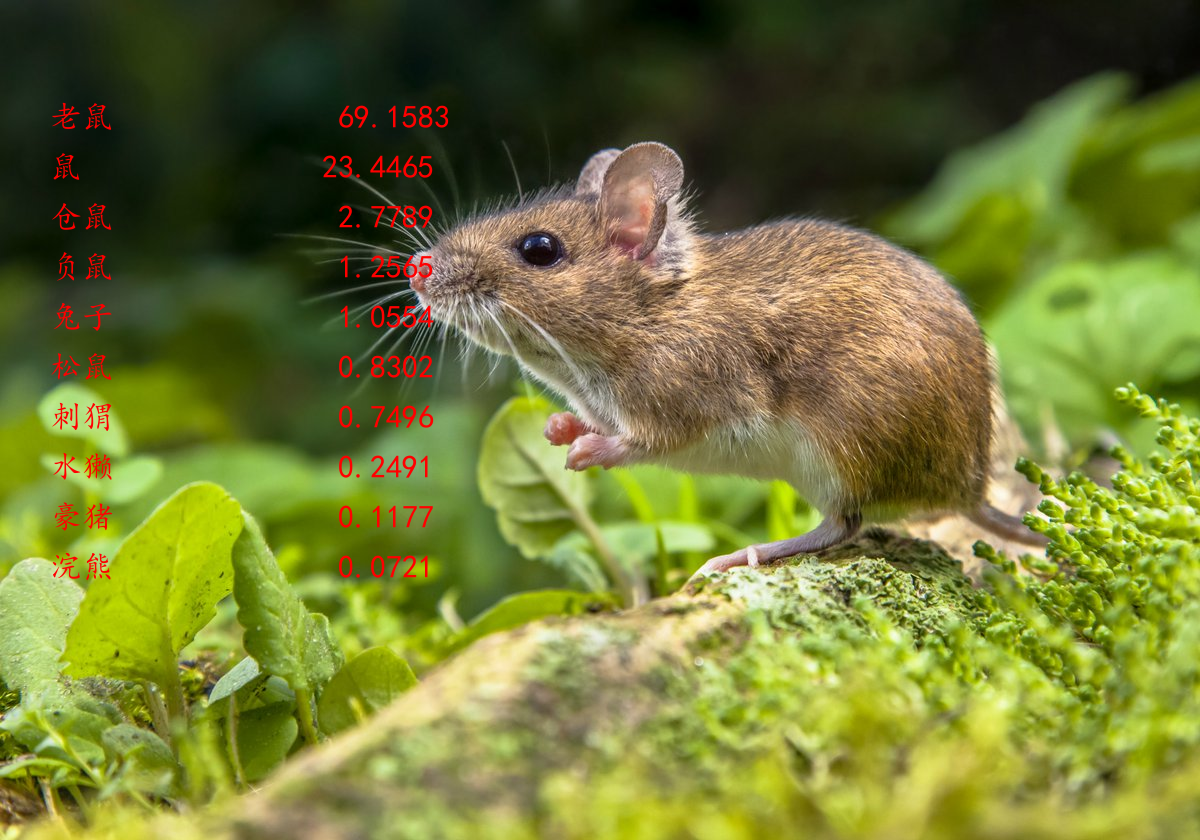

In [165]:
img_pil
